# 1. Importing Libraries

In [1]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras


# Library for Transfer Learning

print("Importing libraries completed.")

Importing libraries completed.


# 2. Data Gethering

In [6]:
# Loading dataset from keras

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

In [7]:
# Verifying dataset

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


## 2.1 Processing data to make it compitable with VGG16

In [8]:
# Convert the images into 3 channels as MNIST images are Black and White so have 1 channel

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape

((60000, 28, 84), (10000, 28, 84))

In [9]:
# Reshape images as per the tensor format required by tensorflow

xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [10]:
# Resize the images 48*48 as required by VGG16

from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

# 3. Preparing Data

In [11]:
# Preparing data

x=[] # to store array value of the images
x=xtrain
y=[] # to store the labels of the images
y=ytrain

test_images=[]
test_images=xtest
test_images_Original=[]
test_images_Original=xtest
test_image_label=[] # to store the labels of the images
test_image_label=ytest

val_images=[]
val_images=xtest
val_images_Original=[]
val_images_Original=xtest
val_image_label=[] # to store the labels of the images
val_image_label=ytest # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


# 4. Verification of Data

In [12]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


In [13]:
test_image_label

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
test_images

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [14]:
# Train the Model

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)



In [ ]:
print("Splitting data for train and test completed.")
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

# 5. Building a Model: Using Transfer Learning

In [18]:
# add preprocessing layer to the front of VGG
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import Model
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, GlobalAveragePooling2D

base_model=MobileNetV2(weights='imagenet',include_top=False, input_shape=(48,48,3))

    
# don't train existing weights
for layer in base_model.layers:
    layer.trainable = False

 #imports the MobileNetV2 model and discards the last 1000 neuron layer.
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
prediction=Dense(10,activation='softmax')(x) #final layer with softmax activation for N classes

model=Model(inputs=base_model.input,outputs=prediction) #specify the inputs and outputs

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 24, 24, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [19]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 24, 24, 32)   864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 24, 24, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 24, 24, 32)   0           bn_Conv1[0][0]                   
_________________________________________________________________

In [20]:
# Fit the Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger
# xtrain2=xtrain.reshape(60000,48,48,3)
# xtest2=xtest.reshape(10000,48,48,3)

history = model.fit(xtrain,ytrain,epochs=20,batch_size=128,verbose=True,validation_data=(xtest,ytest))

print("Fitting the model completed.")

Epoch 1/20
375/375 [==============================] - 163s 418ms/step - loss: 0.6796 - accuracy: 0.7688 - val_loss: 0.5146 - val_accuracy: 0.8292
Epoch 2/20
375/375 [==============================] - 143s 382ms/step - loss: 0.4653 - accuracy: 0.8416 - val_loss: 0.4615 - val_accuracy: 0.8443
Epoch 3/20
375/375 [==============================] - 139s 372ms/step - loss: 0.4148 - accuracy: 0.8578 - val_loss: 0.4527 - val_accuracy: 0.8491
Epoch 4/20
375/375 [==============================] - 155s 415ms/step - loss: 0.3748 - accuracy: 0.8707 - val_loss: 0.4400 - val_accuracy: 0.8558
Epoch 5/20
375/375 [==============================] - 151s 402ms/step - loss: 0.3461 - accuracy: 0.8823 - val_loss: 0.4242 - val_accuracy: 0.8654
Epoch 6/20
375/375 [==============================] - 148s 394ms/step - loss: 0.3214 - accuracy: 0.8886 - val_loss: 0.4186 - val_accuracy: 0.8638
Epoch 7/20
375/375 [==============================] - 138s 367ms/step - loss: 0.3018 - accuracy: 0.8944 - val_loss: 0.4558 -

In [21]:
model.save("efficientnet-b5_MNIST.h5")

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('MobileNetV2_MNIST.h5')

# 6. Model Evaluation

In [22]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))

    
# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.astype('int32'))
    
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    
    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label), 
                                            100*np.max(predictions_array), Get_Element_Name(true_label), 
                                            color=color, horizontalalignment='left'))
        
        
#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label], 
#                                          100*np.max(predictions_array), val_class_names[true_label]), 
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [23]:
test_class_names=[0,1,2,3,4,5,6,7,8,9]
print(test_class_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
predicted_labels=[]
#test_predictions =[]
for img2 in tqdm(test_images):
    img2=img2.reshape(1,48,48,3)
    #test_predictions.append(model.predict(img2))
    predictions = model.predict(img2)
    label= test_class_names[np.argmax(predictions)]
  
    predicted_labels.append(label)
 
  

len(predicted_labels)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [13:20<00:00, 12.50it/s]


10000

In [25]:
predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [33]:
test_image_label

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# define example
data = np.array(predicted_labels)

label_encoder = LabelEncoder()
data = label_encoder.fit_transform(data)
# one hot encode
encoded = to_categorical(data)

In [35]:
encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
# Printing all evaluation matrix
from sklearn.metrics import accuracy_score, classification_report

print("Test accuracy: ",accuracy_score(test_image_label, encoded))
print(classification_report(test_image_label, encoded))

Test accuracy:  0.869
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       980
           1       0.98      0.97      0.97      1135
           2       0.90      0.84      0.87      1032
           3       0.81      0.80      0.80      1010
           4       0.94      0.83      0.88       982
           5       0.81      0.80      0.81       892
           6       0.92      0.96      0.94       958
           7       0.89      0.85      0.87      1028
           8       0.80      0.80      0.80       974
           9       0.80      0.85      0.82      1009

   micro avg       0.87      0.87      0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000
 samples avg       0.87      0.87      0.87     10000



# 7. Predictions

In [20]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [18:37<00:00,  8.94it/s]


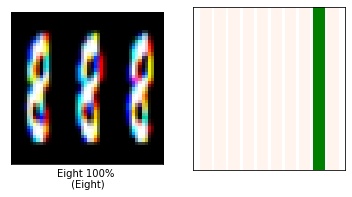

In [21]:
# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, 10000) # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images" 
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original) 
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



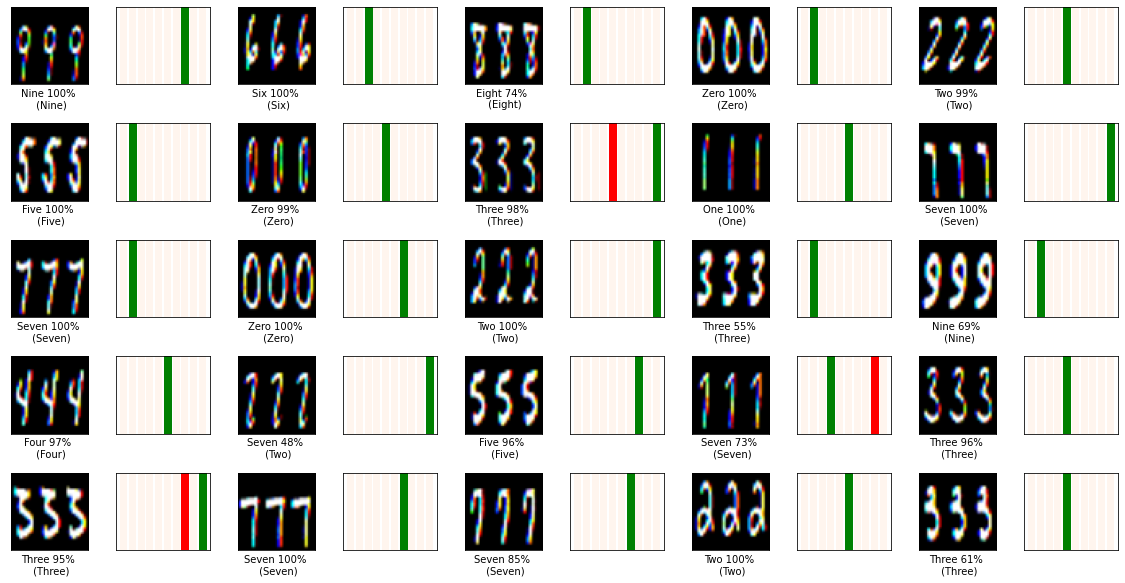

In [22]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    # we are passing "val_images_Original" just to show original image instead of "val_images" 
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

[0.7165833115577698, 0.8742916584014893, 0.9009583592414856, 0.9133750200271606, 0.9193124771118164, 0.921708345413208, 0.9240624904632568, 0.9259791374206543, 0.9283750057220459, 0.9278125166893005, 0.9281874895095825, 0.9287708401679993, 0.9287499785423279, 0.9289791584014893, 0.9294583201408386, 0.9277499914169312, 0.9292708039283752, 0.9290833473205566, 0.9291458129882812, 0.9292083382606506]
[0.8515833616256714, 0.8944166898727417, 0.8952500224113464, 0.9117500185966492, 0.9167500138282776, 0.9224166870117188, 0.9198333621025085, 0.921999990940094, 0.9144999980926514, 0.9239166378974915, 0.9174166917800903, 0.9238333106040955, 0.9231666922569275, 0.9190000295639038, 0.9204166531562805, 0.9176666736602783, 0.9199166893959045, 0.9226666688919067, 0.9164999723434448, 0.9194166660308838]


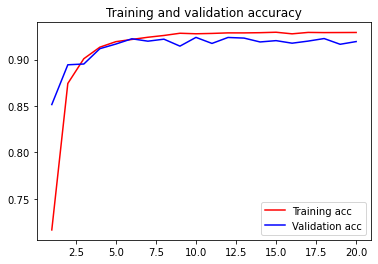

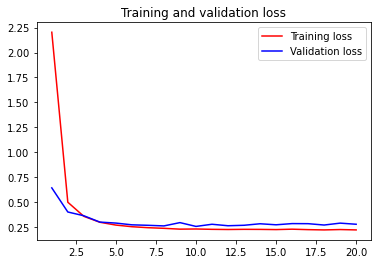

In [28]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:
print("Notebook completed.")